# Project6. Image Classification Using CNN(Matlab Library)

<img src="Screen%20Shot%202019-06-21%20at%204.53.36%20PM.png">


labelCount =

  3x2 table

    Label    Count
    _____    _____

      1      1000 
      2      1000 
      3      1000 

Training on single CPU.
Initializing input data normalization.
|======================================================================================================================|
|  Epoch  |  Iteration  |  Time Elapsed  |  Mini-batch  |  Validation  |  Mini-batch  |  Validation  |  Base Learning  |
|         |             |   (hh:mm:ss)   |   Accuracy   |   Accuracy   |     Loss     |     Loss     |      Rate       |
|======================================================================================================================|
|       1 |           1 |       00:00:04 |       32.81% |       45.00% |       1.5304 |       1.1822 |          0.0300 |
|       1 |          20 |       00:00:19 |       65.62% |       66.67% |       0.8188 |       0.7530 |          0.0300 |
|       2 |          40 |       00:00:33 |       62.50% |       72.00% |       0.8405 

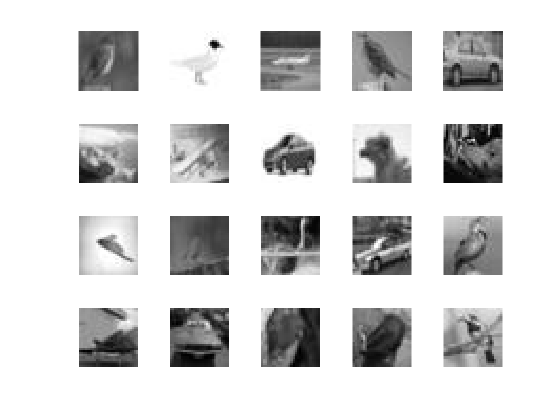

In [1]:
% Script_Name : Assingment6_CNN.m
% author :
% Han Seokhee(2013130874)
% Chung Hyelee(2017130776)
% Hwang Jongho(2018320177)
% < Explantion for the script >
% 1) Classification of 3classes of photos from CIFAR10 using CNN deeplearning algorithm.

%% Create Simple Deep Learning Network for Classification
% CIFAR10 dataset => 1. chosen 3 classes 2. grayscaled and downsampled to 28*28

%% STOLEN FROM MATLAB's OWN DEMO!!!
% This example shows how to create and train a simple convolutional neural
% network for deep learning classification. Convolutional neural networks
% are essential tools for deep learning, and are especially suited for
% image recognition.
%
% The example demonstrates how to: 
%
% * Load and explore image data.
% * Define the network architecture.
% * Specify training options.
% * Train the network.
% * Predict the labels of new data and calculate the classification
% accuracy.

clear all;
close all;
clc;

%% Import images and save different classes of images to different folders

% !!Notice!!
% First download 'five_classes_dataset.mat' in your current directory!!

% Load the file and assign each 1000 of 28*28-gray-scaled images that 
% each belong to 3 classes to variables. 
load('mydata.mat');

% save current directory to make the dataset folder and 5 classes' folder
% within it which are to include all the corresponding images.
current_path = pwd;

% in the current directory, 
% 1). Make 'cifar' folder 
% 2). And three folders, the name of which mean three classes (1,2,3). 
mkdir('cifar/1');
mkdir('cifar/2');
mkdir('cifar/3');


% save each class of images to each folders as jpg files.

% convert 1000 1-D images arrays of class_1 into image and write it as jpg
% within the current_directory/cifar/1
for i = [1:size(new_img_1,1)]
    
    a_img_vec = new_img_1(i,:);
    a_img_mat = reshape(a_img_vec,[28,28]);
    
    imwrite(a_img_mat,sprintf([current_path,'/cifar/1/','%d.jpg'],i),'jpg');
    
end

% convert 1000 1-D images arrays of class_2 into image and write it as jpg
% within the current_directory/cifar/2
for i = [1:size(new_img_2,1)]
    
    a_img_vec = new_img_2(i,:);
    a_img_mat = reshape(a_img_vec,[28,28]);
    
    imwrite(a_img_mat,sprintf([current_path,'/cifar/2/','%d.jpg'],i),'jpg');
    
end

% convert 1000 1-D images arrays of class_3 into image and write it as jpg
% within the current_directory/cifar/3
for i = [1:size(new_img_3,1)]
    
    a_img_vec = new_img_3(i,:);
    a_img_mat = reshape(a_img_vec,[28,28]);
    
    imwrite(a_img_mat,sprintf([current_path,'/cifar/3/','%d.jpg'],i),'jpg');
    
end


%% Load and Explore Image Data
% Load the cifar as an image datastore
%|imageDatastore| automatically labels the images based on folder names 
% and stores the data as an |ImageDatastore| object.
imds = imageDatastore(sprintf([current_path,'/cifar/']),...
    'IncludeSubfolders',true,'LabelSource','foldernames','FileExtensions','.jpg');

%%
% Display some of the images in the datastore.
figure
perm = randperm(3000,20);
for i = 1:20
    subplot(4,5,i);
    imshow(imds.Files{perm(i)})
end

%%
% Calculate the number of images in each category. |labelCount| is a table
% that contains the labels and the number of images having each label. The
% datastore contains 1000 images for each class, for a total of 3000 
% images. You can specify the number of classes in the last fully connected 
% layer of your network as the |OutputSize| argument.
labelCount = countEachLabel(imds)

%%
% You must specify the size of the images in the input layer of the
% network. Check the size of the first image in |digitData|. Each image is
% 28-by-28-by-1 pixels.
img = readimage(imds,1);
size(img);

%% Specify Training and Validation Sets
% 900 training set and 100 testing set.
numTrainFiles = 900;
[imdsTrain,imdsValidation] = splitEachLabel(imds,numTrainFiles,'randomize');

%% Define Network Architecture
% Define the convolutional neural network architecture.

layers = [
    imageInputLayer([28 28 1])
    
    convolution2dLayer(3,64,'Padding','same')
    batchNormalizationLayer
    reluLayer
    maxPooling2dLayer(2,'Stride',2)
    dropoutLayer(0.15)
    
    convolution2dLayer(5,32,'Padding',[0,0])
    batchNormalizationLayer
    reluLayer
    averagePooling2dLayer(2)
    dropoutLayer(0.12)

    fullyConnectedLayer(64)
    reluLayer
    dropoutLayer(0.1)
    
    fullyConnectedLayer(64)
    reluLayer
    batchNormalizationLayer
    
    fullyConnectedLayer(3)
    softmaxLayer
    classificationLayer];

%% iMADGE
% *Image Input Layer* An
% <docid:nnet_ref.mw_fcd2d9b1-ce25-49d1-9d06-b7cf41594ff4> is where you
% specify the image size, which, in this case, is 28-by-28-by-1. These
% numbers correspond to the height, width, and the channel size. The digit
% data consists of grayscale images, so the channel size (color channel) is
% 1. For a color image, the channel size is 3, corresponding to the RGB
% values. You do not need to shuffle the data because |trainNetwork|, by
% default, shuffles the data at the beginning of training.

%%
% *Convolutional Layer* In the convolutional layer, the first argument is
% |filterSize|, which is the height and width of the filters the training
% function uses while scanning along the images. In this example, the
% number 3 indicates that the filter size is 3-by-3. You can specify
% different sizes for the height and width of the filter. The second
% argument is the number of filters, |numFilters|, which is the number of
% neurons that connect to the same region of the input. This parameter
% determines the number of feature maps. Use the |'Padding'| name-value
% pair to add padding to the input feature map. For a filter size of 3, a
% padding of 1 ensures that
%  the spatial output size
% is the same as the input size. You can also define the |Stride| and
% learning rates for this layer using name-value pair arguments of
% <docid:nnet_ref.mw_2d97b6cd-f8aa-4fad-88d6-d34875484820>.

%%
% *Batch Normalization Layer* Batch normalization layers normalize the
% activations and gradients propagating through a network, making network
% training an easier optimization problem. Use batch normalization layers
% between convolutional layers and nonlinearities, such as ReLU layers, to
% speed up network training and reduce the sensitivity to network
% initialization. Use
% <docid:nnet_ref.mw_b7913af4-3a40-4020-bb2c-18c946f5eadd> to create a
% batch normalization layer.

%%
% *ReLU Layer* The batch normalization layer is followed by a nonlinear
% activation function. The most common activation function is the rectified
% linear unit (ReLU). Use
% <docid:nnet_ref.mw_ca5427bd-5cdc-4a58-ba63-302c257d8222> to create a ReLU
% layer.

%%
% *Max-Pooling Layer* Convolutional layers (with activation functions) are
% sometimes followed by a down-sampling operation that reduces the spatial
% size of the feature map and removes redundant spatial information.
% Down-sampling makes it possible to increase the number of filters in
% deeper convolutional layers without increasing the required amount of
% computation per layer. One way of down-sampling is using a max pooling,
% which you create using
%  <docid:nnet_ref.mw_d2785483-a560-4276-a1c0-daa5f58a1d4b>.
% The max pooling layer returns the maximum values of rectangular regions
% of inputs, specified by the first argument, |poolSize|. In this example,
% the size of the rectangular region is [2,2]. The |'Stride'| name-value
% pair argument specifies the step size that the training function takes as
% it scans along the input.

%%
% *Fully Connected Layer* The convolutional and down-sampling layers are
% followed by one or more fully connected layers. As its name suggests, a
% fully connected layer is a layer in which the neurons connect to all the
% neurons in the preceding layer. This layer combines all the features
% learned by the previous layers across the image to identify the larger
% patterns. The last fully connected layer combines the features to
% classify the images. Therefore, the |OutputSize| parameter in the last
% fully connected layer is equal to the number of classes in the target
% data. In this example, the output size is 10, corresponding to the 10
% classes. Use <docid:nnet_ref.mw_1e7fbc56-4746-4f30-8cd9-7048ce806a0d> to
% create a fully connected layer.

%%
% *Softmax Layer* The softmax activation function normalizes the output of
% the fully connected layer. The output of the softmax layer consists of
% positive numbers that sum to one, which can then be used as
% classification probabilities by the classification layer. Create a
% softmax layer using the
% <docid:nnet_ref.mw_a09d3c68-d062-4692-a950-9a7fea5c40c3> function after
% the last fully connected layer.

%%
% *Classification Layer* The final layer is the classification layer. This
% layer uses the probabilities returned by the softmax activation function
% for each input to assign the input to one of the mutually exclusive
% classes and compute the loss. To create a classification layer, use
% <docid:nnet_ref.bu5lho8>.

%% Specify Training Options
% After defining the network structure, specify the training options. Set
% the maximum number of epochs to 3. An epoch is a full training cycle on
% the entire training data set. Start training with an initial learning
% rate of 0.01. Monitor the network accuracy during training by specifying
% validation data and validation frequency. The software trains the network
% on the training data and calculates the accuracy on the validation data
% at regular intervals during training. The validation data is not used to
% update the network weights. Turn on the training progress plot, and turn
% off the command window output.
options = trainingOptions('sgdm', ...
    'InitialLearnRate',0.03, ...
    'MaxEpochs',5, ...
    'Shuffle','every-epoch', ...
    'ValidationData',imdsValidation, ...
    'ValidationFrequency',20, ...
    'Verbose',true, ...
    'Plots','training-progress');

%% Train Network Using Training Data
% Train the network using the architecture defined by |layers|, the
% training data, and the training options.  By default, |trainNetwork| uses
% a GPU if one is available (requires Parallel Computing Toolbox(TM) and a
% CUDA-enabled GPU with compute capability 3.0 or higher). Otherwise, it
% uses a CPU. You can also specify the execution environment by using the
% |'ExecutionEnvironment'| name-value pair argument of |trainingOptions|.

%%
% The training progress plot shows the mini-batch loss and accuracy and the
% validation loss and accuracy. For more information on the training
% progress plot, see
% <docid:nnet_examples.mw_507458b6-14c3-4a31-884c-9f2119ff7e05>. The loss
% is the <docid:nnet_ref.bu80p30-3 cross-entropy loss>. The accuracy is the
% percentage of images that the network classifies correctly.
net = trainNetwork(imdsTrain,layers,options);



%% Classify Validation Images and Compute Accuracy
% Predict the labels of the validation data using the trained network, and
% calculate the final validation accuracy. Accuracy is the fraction of
% labels that the network predicts correctly. In this case, more than 99%
% of the predicted labels match the true labels of the validation set.

predictedLabels = classify(net,imdsValidation);
valLabels = imdsValidation.Labels;

accuracy = (sum(predictedLabels == valLabels)/numel(valLabels))

# * In 3 Classes Image Classification, Our Model receached 77%ish Accuracy.

<img src="Screen%20Shot%202019-06-21%20at%204.57.14%20PM.png">